In [ ]:
import tenseal as ts
import numpy as np
from time import time


## Encryption Parameters

# controls precision of the fractional part
bits_scale = 26

# Create TenSEAL context
context = ts.context(
    ts.SCHEME_TYPE.CKKS,
    poly_modulus_degree=8192 * 2 ,
    coeff_mod_bit_sizes=[31, bits_scale, bits_scale, bits_scale, bits_scale, bits_scale, bits_scale, 31]
)

# set the scale
context.global_scale = pow(2, bits_scale)

# galois keys are required to do ciphertext rotations
context.generate_galois_keys()

secret_key = context.secret_key()
context.make_context_public()

enc_vec = (ts.ckks_vector(context=context, vector=[10, 20, 30]))
enc_vec2 = (ts.ckks_vector(context=context, vector=[0.2, 1.2, 0.004]))


In [6]:
import cv2

In [5]:
img = [[ts.ckks_vector(context=context, vector=[i+j]) for i in range(10)] for j in range(10)]
img = np.array(img, dtype=ts.CKKSVector)


In [9]:
cv2.GaussianBlur(img, 3, 3)

error: OpenCV(4.10.0) :-1: error: (-5:Bad argument) in function 'GaussianBlur'
> Overload resolution failed:
>  - src data type = object is not supported
>  - Expected Ptr<cv::UMat> for argument 'src'


In [4]:
import math

In [2]:
def f(x, n=10):
    result = 0
    sigma = 0.1
    sub = 2
    for k in range(n):
        sign = (-1) ** k
        coefficient = 1 / (math.factorial(k) * (sigma ** (k - sub)))
        # coefficient = 1
        term = ( (x)) ** (2 * k)
        if isinstance(term, ts.CKKSVector):
            print(k, sign, coefficient, term.decrypt(secret_key))
        else:
            print(k, sign, coefficient, term)
        result += (sign * term) * coefficient
    if isinstance(term, ts.CKKSVector):
        print(result.decrypt(secret_key), 1/ (sigma ** sub))
    else:
        print(result, 1/ (sigma ** sub))
    kk = 1/ (sigma ** sub)
    return result * kk
    

In [32]:
def g(x, r, c = 0.01, depth=1):
    k = (1/r)**2
    k2 = 4 * k
    a = (-(k * (x*x))) + 1
    b = (-(k2 * (x*x))) + 1
    for _ in range(depth):
        a = (a + c)*(a + c)
        b = (b + c)*(b + c)
    return (a * b)

In [58]:
e = (ts.ckks_vector(context=context, vector=[0.03]))
d = g(e, 0.20000000000000007)
d.decrypt(secret_key)

[0.8352059326714916]

0.9409

In [76]:
e

In [ ]:
e = (ts.ckks_vector(context=context, vector=[0.3]))



In [5]:
f(0.4, 6)

0 1 0.010000000000000002 1.0
1 -1 0.1 0.16000000000000003
2 1 0.5 0.025600000000000005
3 -1 1.6666666666666665 0.0040960000000000015
4 1 4.166666666666666 0.0006553600000000003
5 -1 8.333333333333332 0.00010485760000000006
0.001830186666666666 99.99999999999999


0.18301866666666658

In [9]:
e = (ts.ckks_vector(context=context, vector=[0.4]))
d = f(e, 6)
d.decrypt(secret_key)

0 1 0.010000000000000002 [1.0000000176730248]
1 -1 0.1 [0.16000240515323563]
2 1 0.5 [0.025602415989406237]
3 -1 1.6666666666666665 [0.004096799775067086]
4 1 4.166666666666666 [0.0006555575657043001]
5 -1 8.333333333333332 [0.00010485320432664413]


ValueError: scale out of bounds

[0.3217318177658062]

In [143]:
e1 = (ts.ckks_vector(context=context, vector=[-0.02]))
e2 = (ts.ckks_vector(context=context, vector=[99.999]))
e = e1 * e2
e.decrypt(secret_key), e1.decrypt(secret_key), e2.decrypt(secret_key)

([-2.0067984285871137], [-0.020048525713246515], [99.99897943745498])

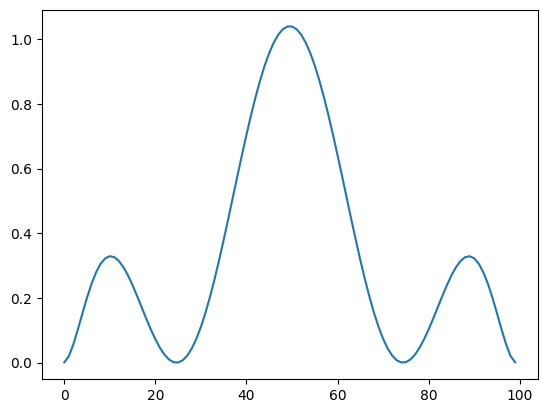

In [4]:
import matplotlib.pyplot as plt
ls = [g(i, 1) for i in np.linspace(-1, 1, 100)]
plt.plot(ls)

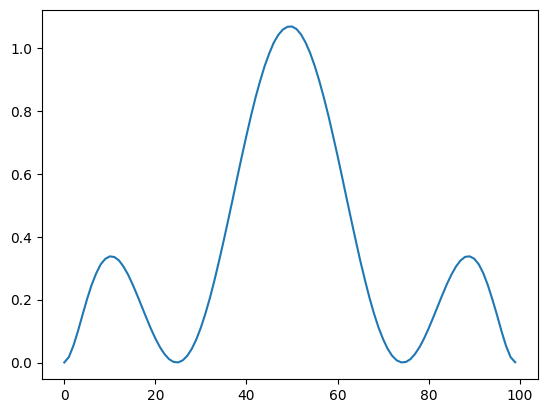

In [35]:
import matplotlib.pyplot as plt
ls = [g(ts.ckks_vector(context=context, vector=[i]), 1).decrypt(secret_key) for i in np.linspace(-1, 1, 100)]
plt.plot(ls)


In [8]:
!pip install matplotlib

  Using cached importlib_resources-6.4.5-py3-none-any.whl.metadata (4.0 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 5.9 MB/s eta 0:00:000:00:010:00:01:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 5.8 MB/s eta 0:00:00 MB/s eta 0:00:01
Using cached importlib_resources-6.4.5-py3-none-any.whl (36 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 5.7 MB/s eta 0:00:00 MB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.4/4.4 MB 5.8 MB/s eta 0:00:00 MB/s eta 0:00:01:01

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip


In [66]:
def binni(x, a, b, n):
    hist = [0] * n
    samples = np.linspace(a, b, n+1)
    for i, (ai, bi) in enumerate(zip(samples[:-1], samples[1:])):
        print(ai, bi, bi-ai)
        mid = (ai + bi)/2
        print((x-mid).decrypt(secret_key))
        hist[i] = g(x - mid, b - a, c=0.00001, depth=3)
    return hist

In [ ]:
hist = binni(ts.ckks_vector(context=context, vector=[125]), 0, 360, 36)
[h.decrypt(secret_key) for h in hist]
# hist

0.0 10.0 10.0
[120.00003721242163]
10.0 20.0 10.0
[110.00003721242163]
20.0 30.0 10.0
[100.00003721242163]
30.0 40.0 10.0
[90.00003721242163]
40.0 50.0 10.0
[80.00003721242163]
50.0 60.0 10.0
[70.00003721242163]
60.0 70.0 10.0
[60.00003721242162]
70.0 80.0 10.0
[50.00003721242162]
80.0 90.0 10.0
[40.00003721242162]
90.0 100.0 10.0
[30.000037212421617]
100.0 110.0 10.0
[20.000037212421617]
110.0 120.0 10.0
[10.000037212421619]
120.0 130.0 10.0
[3.721242161869377e-05]
130.0 140.0 10.0
[-9.999962787578381]
140.0 150.0 10.0
[-19.999962787578383]
150.0 160.0 10.0
[-29.999962787578383]
160.0 170.0 10.0
[-39.99996278757838]
170.0 180.0 10.0
[-49.99996278757838]
180.0 190.0 10.0
[-59.99996278757838]
190.0 200.0 10.0
[-69.99996278757837]
200.0 210.0 10.0
[-79.99996278757837]
210.0 220.0 10.0
[-89.99996278757837]
220.0 230.0 10.0
[-99.99996278757837]
230.0 240.0 10.0
[-109.99996278757837]
240.0 250.0 10.0
[-119.99996278757837]
250.0 260.0 10.0
[-129.9999627875784]
260.0 270.0 10.0
[-139.99996278

[[0.004079018122937242],
 [0.01262939032266846],
 [0.031886838918805664],
 [0.06978397803224866],
 [0.13461840052603063],
 [0.23297318512025142],
 [0.36720488114195377],
 [0.5327462790944363],
 [0.7153551003322535],
 [0.8943687574680328],
 [1.047626237783564],
 [1.1505893248179335],
 [1.1898021020162148],
 [1.1505982503550995],
 [1.047377700771095],
 [0.8966216197389651],
 [0.7149102839517728],
 [0.5322583886098339],
 [0.3672566520690302],
 [0.2327980450041415],
 [0.13461731530269064],
 [0.06984950127933579],
 [0.03189662566844878],
 [0.012522895254895238],
 [0.003986736471846859],
 [0.0009832614743579145],
 [0.00012745284345481552],
 [2.7263636721812197e-05],
 [-0.00011857330784686972],
 [-1.754659024677017e-05],
 [-0.00011321893611438962],
 [3.328536895470616e-05],
 [-3.2219532796893624e-05],
 [6.854351619425536e-05],
 [0.00010979874614339556],
 [0.00045620240611495954]]